<a href="https://colab.research.google.com/github/enriquejujuy/IPDI/blob/main/IPDI_TP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **TP N° 2**
### **Choque Enrique**

In [3]:
import imageio
import numpy as np
import matplotlib.pyplot as plt

<ipython-input-5-4438a6080900>:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img=np.clip(imageio.imread('/content/image1.png')/255,0,1)
<ipython-input-5-4438a6080900>:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img2=np.clip(imageio.imread('/content/image2.png')/255,0,1)


(500, 1000, 3)
float64
(500, 1000, 3)
float64


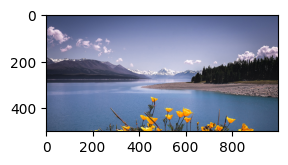

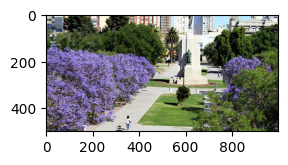

In [5]:
img=np.clip(imageio.imread('/content/image1.png')/255,0,1)
img2=np.clip(imageio.imread('/content/image2.png')/255,0,1)

print(img.shape)
print(img.dtype)
print(img2.shape)
print(img2.dtype)
plt.figure(figsize=(3, 5))  # Ajusta el tamaño de la figura
plt.imshow(img)
plt.show()
plt.figure(figsize=(3, 5))  # Ajusta el tamaño de la figura
plt.imshow(img2)
plt.show()

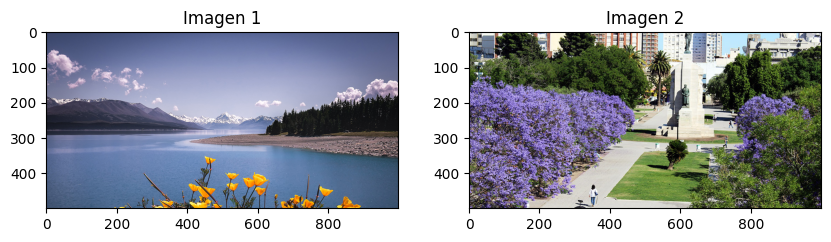

In [6]:
# prompt: cargar dos imagenes y mostrarla una al lado de la otra

import matplotlib.pyplot as plt

# ... (previous code)

# Mostrar las imágenes lado a lado
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 fila, 2 columnas
axs[0].imshow(img)
axs[0].set_title('Imagen 1')
axs[1].imshow(img2)
axs[1].set_title('Imagen 2')
plt.show()


Funcion cuasisuma clampeada en el espacio RGB

In [13]:
def cuasisuma_clampeada(img1, img2, alpha=0.5):
  """
  Calcula la cuasisuma clampeada de dos imágenes en el espacio RGB.

  Args:
    img1: La primera imagen.
    img2: La segunda imagen.
    alpha: El factor de ponderación para la primera imagen (0 <= alpha <= 1).

  Returns:
    La imagen resultante de la cuasisuma clampeada.
  """
  # Asegúrate de que las imágenes tengan la misma forma
  if img1.shape != img2.shape:
    raise ValueError("Las imágenes deben tener la misma forma.")

  # Calcula la cuasisuma
  result = alpha * img1 + (1 - alpha) * img2

  # Clampea los valores para que estén entre 0 y 1
  result = np.clip(result, 0, 1)

  return result


Funcion cuasisuma promediada en el espacio RGB

In [16]:
def cuasisuma_promediada(img1, img2, alpha=0.5):
  """
  Calcula la cuasisuma promediada de dos imágenes en el espacio RGB.

  Args:
    img1: La primera imagen.
    img2: La segunda imagen.
    alpha: El factor de ponderación para la primera imagen (0 <= alpha <= 1).

  Returns:
    La imagen resultante de la cuasisuma promediada.
  """
  # Asegúrate de que las imágenes tengan la misma forma
  if img1.shape != img2.shape:
    raise ValueError("Las imágenes deben tener la misma forma.")

  # Calcula la cuasisuma
  result = alpha * img1 + (1 - alpha) * img2

  # Divide por 2 para obtener el promedio
  result /= 2

  return result

Suma clampeada y promediada en el espacio RGB

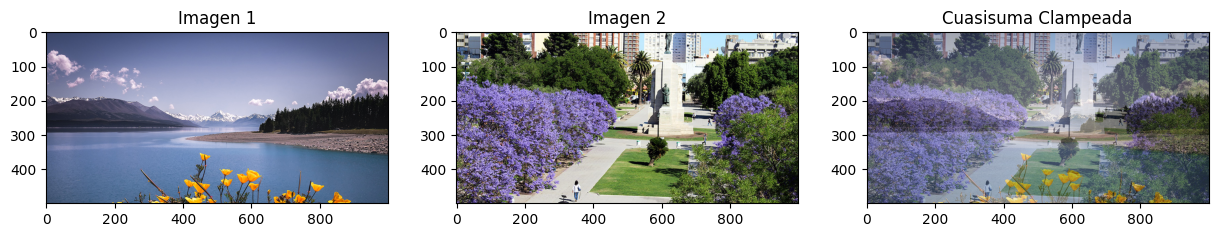

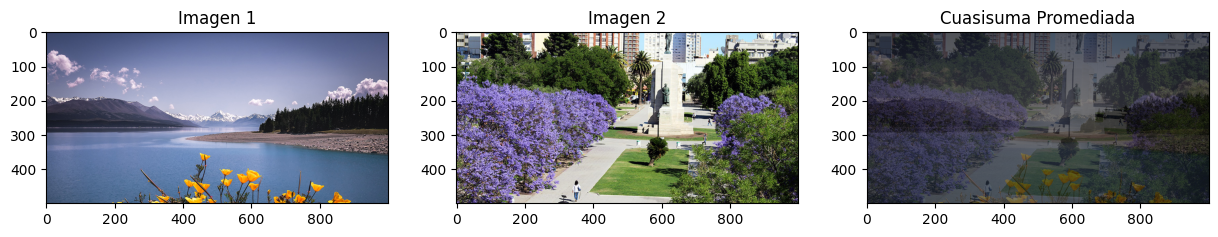

In [17]:
# Llama a las funciones
img_clampeada = cuasisuma_clampeada(img, img2, alpha=0.5)
img_promediada = cuasisuma_promediada(img, img2, alpha=0.5)

# Mostrar las imágenes
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # 1 fila, 3 columnas
axs[0].imshow(img)
axs[0].set_title('Imagen 1')
axs[1].imshow(img2)
axs[1].set_title('Imagen 2')
axs[2].imshow(img_clampeada)
axs[2].set_title('Cuasisuma Clampeada')
plt.show()

fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # 1 fila, 3 columnas
axs[0].imshow(img)
axs[0].set_title('Imagen 1')
axs[1].imshow(img2)
axs[1].set_title('Imagen 2')
axs[2].imshow(img_promediada)
axs[2].set_title('Cuasisuma Promediada')
plt.show()


Resta de dos imagenes en el espacio RGB

In [29]:

def resta_imagenes(img1, img2):
  """
  Resta dos imágenes en el espacio RGB.

  Args:
    img1: La primera imagen.
    img2: La segunda imagen.

  Returns:
    La imagen resultante de la resta.
  """
  # Asegúrate de que las imágenes tengan la misma forma
  if img1.shape != img2.shape:
    raise ValueError("Las imágenes deben tener la misma forma.")

  # Calcula la resta
  result = img1 - img2

  # Clampea los valores para que estén entre 0 y 1
  result = np.clip(result, 0, 1)

  return result

# Llama a la función
img_resta = resta_imagenes(img, img2)

# Mostrar las imágenes
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # 1 fila, 3 columnas
axs[0].imshow(img)
axs[0].set_title('Imagen 1')
axs[1].imshow(img2)
axs[1].set_title('Imagen 2')
axs[2].imshow(img_resta)
axs[2].set_title('Resta de Imágenes')
plt.show()


Funcion para pasar del espacio RGB al espacio YIQ

In [19]:

import numpy as np

def rgb_to_yiq(img):
  """
  Convierte una imagen del espacio de color RGB al espacio YIQ.

  Args:
    img: La imagen en el espacio RGB.

  Returns:
    La imagen en el espacio YIQ.
  """
  # Matriz de transformación de RGB a YIQ
  transform_matrix = np.array([[0.299, 0.587, 0.114],
                               [0.596, -0.275, -0.321],
                               [0.212, -0.523, 0.311]])

  # Convertir la imagen al espacio YIQ
  img_yiq = np.dot(img.reshape(-1, 3), transform_matrix.T).reshape(img.shape)

  return img_yiq


Suma clampeada del canal Y

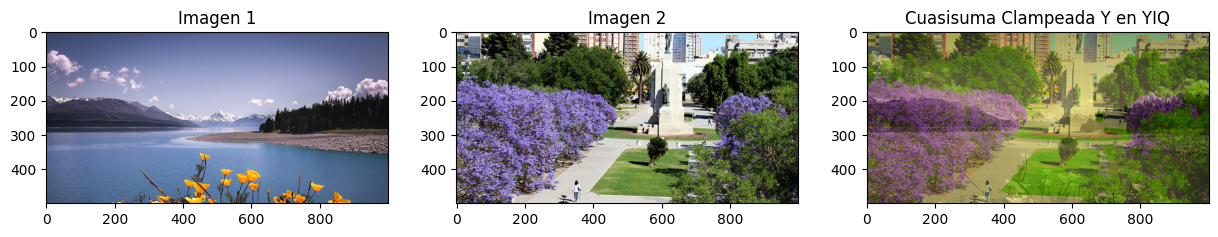

In [21]:

def cuasisuma_clampeada_y_yiq(img1_yiq, img2_yiq, alpha=0.5):
  """
  Calcula la cuasisuma clampeada del canal Y de dos imágenes en el espacio YIQ.

  Args:
    img1_yiq: La primera imagen en el espacio YIQ.
    img2_yiq: La segunda imagen en el espacio YIQ.
    alpha: El factor de ponderación para la primera imagen (0 <= alpha <= 1).

  Returns:
    La imagen resultante de la cuasisuma clampeada del canal Y en el espacio YIQ.
  """
  # Asegúrate de que las imágenes tengan la misma forma
  if img1_yiq.shape != img2_yiq.shape:
    raise ValueError("Las imágenes deben tener la misma forma.")

  # Calcula la cuasisuma del canal Y
  result_y = alpha * img1_yiq[:, :, 0] + (1 - alpha) * img2_yiq[:, :, 0]

  # Clampea los valores del canal Y para que estén entre 0 y 1
  result_y = np.clip(result_y, 0, 1)

  # Combina el canal Y con los canales I y Q de la segunda imagen
  result_yiq = np.stack((result_y, img2_yiq[:, :, 1], img2_yiq[:, :, 2]), axis=-1)

  return result_yiq

# Convertir las imágenes al espacio YIQ
img_yiq = rgb_to_yiq(img)
img2_yiq = rgb_to_yiq(img2)

# Calcular la cuasisuma clampeada del canal Y en el espacio YIQ
img_clampeada_yiq = cuasisuma_clampeada_y_yiq(img_yiq, img2_yiq, alpha=0.5)

# Convertir la imagen resultante de YIQ a RGB
img_clampeada_rgb = np.dot(img_clampeada_yiq.reshape(-1, 3), np.linalg.inv(np.array([[0.299, 0.596, 0.212],
                                                                                             [0.587, -0.275, -0.523],
                                                                                             [0.114, -0.321, 0.311]])).T).reshape(img_clampeada_yiq.shape)

# Mostrar las imágenes originales y el resultado
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # 1 fila, 3 columnas
axs[0].imshow(img)
axs[0].set_title('Imagen 1')
axs[1].imshow(img2)
axs[1].set_title('Imagen 2')
axs[2].imshow(img_clampeada_rgb)
axs[2].set_title('Cuasisuma Clampeada Y en YIQ')
plt.show()


Suma promediada del canal Y en el espacio YIQ

In [22]:

def cuasisuma_promediada_y_yiq(img1_yiq, img2_yiq, alpha=0.5):
  """
  Calcula la cuasisuma promediada del canal Y de dos imágenes en el espacio YIQ.

  Args:
    img1_yiq: La primera imagen en el espacio YIQ.
    img2_yiq: La segunda imagen en el espacio YIQ.
    alpha: El factor de ponderación para la primera imagen (0 <= alpha <= 1).

  Returns:
    La imagen resultante de la cuasisuma promediada del canal Y en el espacio YIQ.
  """
  # Asegúrate de que las imágenes tengan la misma forma
  if img1_yiq.shape != img2_yiq.shape:
    raise ValueError("Las imágenes deben tener la misma forma.")

  # Calcula la cuasisuma del canal Y
  result_y = alpha * img1_yiq[:, :, 0] + (1 - alpha) * img2_yiq[:, :, 0]

  # Divide por 2 para obtener el promedio
  result_y /= 2

  # Combina el canal Y con los canales I y Q de la segunda imagen
  result_yiq = np.stack((result_y, img2_yiq[:, :, 1], img2_yiq[:, :, 2]), axis=-1)

  return result_yiq

# Convertir las imágenes al espacio YIQ
img_yiq = rgb_to_yiq(img)
img2_yiq = rgb_to_yiq(img2)

# Calcular la cuasisuma promediada del canal Y en el espacio YIQ
img_promediada_yiq = cuasisuma_promediada_y_yiq(img_yiq, img2_yiq, alpha=0.5)

# Convertir la imagen resultante de YIQ a RGB
img_promediada_rgb = np.dot(img_promediada_yiq.reshape(-1, 3), np.linalg.inv(np.array([[0.299, 0.596, 0.212],
                                                                                             [0.587, -0.275, -0.523],
                                                                                             [0.114, -0.321, 0.311]])).T).reshape(img_promediada_yiq.shape)

# Mostrar las imágenes originales y el resultado
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # 1 fila, 3 columnas
axs[0].imshow(img)
axs[0].set_title('Imagen 1')
axs[1].imshow(img2)
axs[1].set_title('Imagen 2')
axs[2].imshow(img_promediada_rgb)
axs[2].set_title('Cuasisuma Promediada Y en YIQ')
plt.show()


Resta de dos imagenes en el espacio YIQ

In [30]:

def resta_imagenes_y_yiq(img1_yiq, img2_yiq):
  """
  Resta dos imágenes en el canal Y del espacio YIQ.

  Args:
    img1_yiq: La primera imagen en el espacio YIQ.
    img2_yiq: La segunda imagen en el espacio YIQ.

  Returns:
    La imagen resultante de la resta en el canal Y del espacio YIQ.
  """
  # Asegúrate de que las imágenes tengan la misma forma
  if img1_yiq.shape != img2_yiq.shape:
    raise ValueError("Las imágenes deben tener la misma forma.")

  # Calcula la resta del canal Y
  result_y = img1_yiq[:, :, 0] - img2_yiq[:, :, 0]

  # Clampea los valores del canal Y para que estén entre 0 y 1
  result_y = np.clip(result_y, 0, 1)

  # Combina el canal Y con los canales I y Q de la segunda imagen
  result_yiq = np.stack((result_y, img2_yiq[:, :, 1], img2_yiq[:, :, 2]), axis=-1)

  return result_yiq

# Convertir las imágenes al espacio YIQ
img_yiq = rgb_to_yiq(img)
img2_yiq = rgb_to_yiq(img2)

# Calcular la resta del canal Y en el espacio YIQ
img_resta_yiq = resta_imagenes_y_yiq(img_yiq, img2_yiq)

# Convertir la imagen resultante de YIQ a RGB
img_resta_rgb = np.dot(img_resta_yiq.reshape(-1, 3), np.linalg.inv(np.array([[0.299, 0.596, 0.212],
                                                                                   [0.587, -0.275, -0.523],
                                                                                   [0.114, -0.321, 0.311]])).T).reshape(img_resta_yiq.shape)

# Mostrar las imágenes originales y el resultado
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # 1 fila, 3 columnas
axs[0].imshow(img)
axs[0].set_title('Imagen 1')
axs[1].imshow(img2)
axs[1].set_title('Imagen 2')
axs[2].imshow(img_resta_rgb)
axs[2].set_title('Resta Y en YIQ')
plt.show()


Producto de dos imagenes en RGB

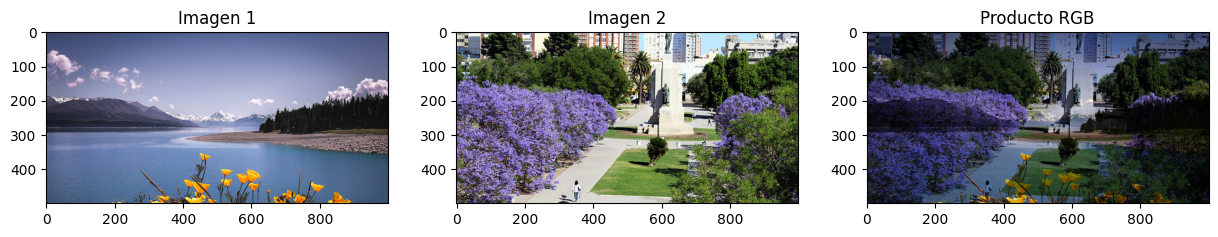

In [24]:
# prompt: crear codigo para el producto de dos imagenes en el espacio RGB

def producto_rgb(img1, img2):
  """
  Calcula el producto de dos imágenes en el espacio RGB.

  Args:
    img1: La primera imagen.
    img2: La segunda imagen.

  Returns:
    La imagen resultante del producto.
  """
  # Asegúrate de que las imágenes tengan la misma forma
  if img1.shape != img2.shape:
    raise ValueError("Las imágenes deben tener la misma forma.")

  # Calcula el producto de las imágenes
  result = img1 * img2

  # Clampea los valores para que estén entre 0 y 1
  result = np.clip(result, 0, 1)

  return result

# Calcular el producto de las imágenes
img_producto = producto_rgb(img, img2)

# Mostrar las imágenes originales y el resultado
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # 1 fila, 3 columnas
axs[0].imshow(img)
axs[0].set_title('Imagen 1')
axs[1].imshow(img2)
axs[1].set_title('Imagen 2')
axs[2].imshow(img_producto)
axs[2].set_title('Producto RGB')
plt.show()


Division de dos imagenes en RGB

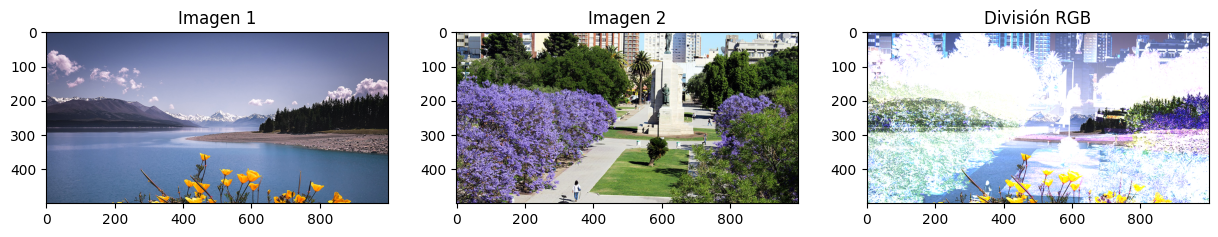

In [25]:

def division_rgb(img1, img2, epsilon=1e-8):
  """
  Calcula la división de dos imágenes en el espacio RGB.

  Args:
    img1: La primera imagen (numerador).
    img2: La segunda imagen (denominador).
    epsilon: Un valor pequeño para evitar la división por cero.

  Returns:
    La imagen resultante de la división.
  """
  # Asegúrate de que las imágenes tengan la misma forma
  if img1.shape != img2.shape:
    raise ValueError("Las imágenes deben tener la misma forma.")

  # Calcula la división de las imágenes
  result = img1 / (img2 + epsilon)

  # Clampea los valores para que estén entre 0 y 1
  result = np.clip(result, 0, 1)

  return result

# Calcular la división de las imágenes
img_division = division_rgb(img, img2)

# Mostrar las imágenes originales y el resultado
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # 1 fila, 3 columnas
axs[0].imshow(img)
axs[0].set_title('Imagen 1')
axs[1].imshow(img2)
axs[1].set_title('Imagen 2')
axs[2].imshow(img_division)
axs[2].set_title('División RGB')
plt.show()


Resta de dos imagenes implementando el valor absoluto

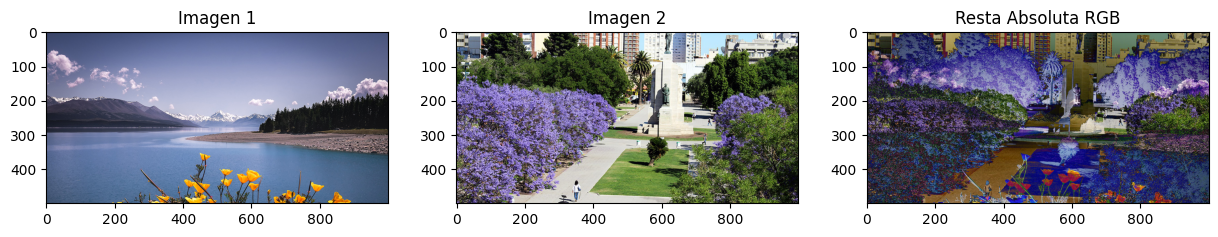

In [26]:
# prompt: resta de dos imagenes implementando el valor absoluto

def resta_absoluta_rgb(img1, img2):
  """
  Calcula la resta de dos imágenes en el espacio RGB utilizando el valor absoluto.

  Args:
    img1: La primera imagen.
    img2: La segunda imagen.

  Returns:
    La imagen resultante de la resta con valor absoluto.
  """
  # Asegúrate de que las imágenes tengan la misma forma
  if img1.shape != img2.shape:
    raise ValueError("Las imágenes deben tener la misma forma.")

  # Calcula la resta con valor absoluto
  result = np.abs(img1 - img2)

  return result

# Calcular la resta con valor absoluto de las imágenes
img_resta_absoluta = resta_absoluta_rgb(img, img2)

# Mostrar las imágenes originales y el resultado
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # 1 fila, 3 columnas
axs[0].imshow(img)
axs[0].set_title('Imagen 1')
axs[1].imshow(img2)
axs[1].set_title('Imagen 2')
axs[2].imshow(img_resta_absoluta)
axs[2].set_title('Resta Absoluta RGB')
plt.show()


Suma if-ligther

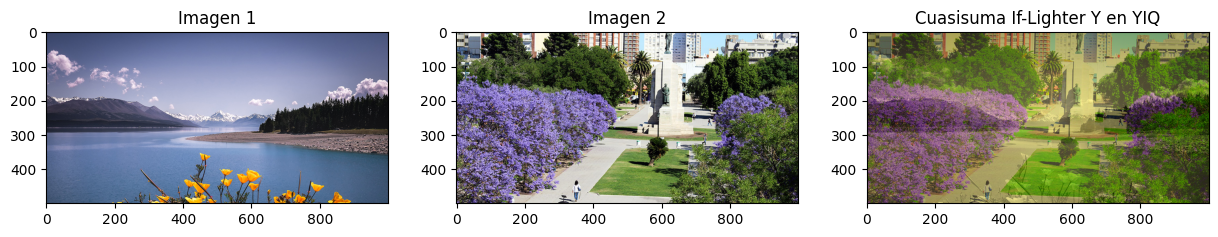

In [27]:
# prompt: cuasisuma if-ligther de dos imagenes en el espacio yiq

def cuasisuma_if_lighter_yiq(img1_yiq, img2_yiq, alpha=0.5):
  """
  Calcula la cuasisuma if-lighter de dos imágenes en el espacio YIQ.

  Args:
    img1_yiq: La primera imagen en el espacio YIQ.
    img2_yiq: La segunda imagen en el espacio YIQ.
    alpha: El factor de ponderación para la primera imagen (0 <= alpha <= 1).

  Returns:
    La imagen resultante de la cuasisuma if-lighter en el espacio YIQ.
  """
  # Asegúrate de que las imágenes tengan la misma forma
  if img1_yiq.shape != img2_yiq.shape:
    raise ValueError("Las imágenes deben tener la misma forma.")

  # Obtén el canal Y de ambas imágenes
  y1 = img1_yiq[:, :, 0]
  y2 = img2_yiq[:, :, 0]

  # Crea una máscara donde el canal Y de la primera imagen sea mayor que el de la segunda
  mask = y1 > y2

  # Crea una nueva imagen con la cuasisuma if-lighter
  result_y = np.where(mask,
                      alpha * y1 + (1 - alpha) * y2,
                      alpha * y2 + (1 - alpha) * y1)

  # Combina el canal Y resultante con los canales I y Q de la segunda imagen
  result_yiq = np.stack((result_y, img2_yiq[:, :, 1], img2_yiq[:, :, 2]), axis=-1)

  return result_yiq

# Convertir las imágenes al espacio YIQ
img_yiq = rgb_to_yiq(img)
img2_yiq = rgb_to_yiq(img2)

# Calcular la cuasisuma if-lighter en el espacio YIQ
img_if_lighter_yiq = cuasisuma_if_lighter_yiq(img_yiq, img2_yiq, alpha=0.5)

# Convertir la imagen resultante de YIQ a RGB
img_if_lighter_rgb = np.dot(img_if_lighter_yiq.reshape(-1, 3), np.linalg.inv(np.array([[0.299, 0.596, 0.212],
                                                                                             [0.587, -0.275, -0.523],
                                                                                             [0.114, -0.321, 0.311]])).T).reshape(img_if_lighter_yiq.shape)

# Mostrar las imágenes originales y el resultado
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # 1 fila, 3 columnas
axs[0].imshow(img)
axs[0].set_title('Imagen 1')
axs[1].imshow(img2)
axs[1].set_title('Imagen 2')
axs[2].imshow(img_if_lighter_rgb)
axs[2].set_title('Cuasisuma If-Lighter Y en YIQ')
plt.show()


Suma if-darker en YIQ

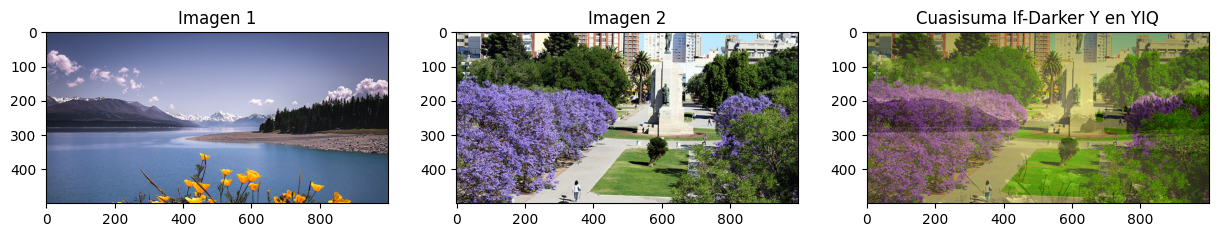

In [28]:
# prompt: suma if-darker en el espacio YIQ

def cuasisuma_if_darker_yiq(img1_yiq, img2_yiq, alpha=0.5):
  """
  Calcula la cuasisuma if-darker de dos imágenes en el espacio YIQ.

  Args:
    img1_yiq: La primera imagen en el espacio YIQ.
    img2_yiq: La segunda imagen en el espacio YIQ.
    alpha: El factor de ponderación para la primera imagen (0 <= alpha <= 1).

  Returns:
    La imagen resultante de la cuasisuma if-darker en el espacio YIQ.
  """
  # Asegúrate de que las imágenes tengan la misma forma
  if img1_yiq.shape != img2_yiq.shape:
    raise ValueError("Las imágenes deben tener la misma forma.")

  # Obtén el canal Y de ambas imágenes
  y1 = img1_yiq[:, :, 0]
  y2 = img2_yiq[:, :, 0]

  # Crea una máscara donde el canal Y de la primera imagen sea menor que el de la segunda
  mask = y1 < y2

  # Crea una nueva imagen con la cuasisuma if-darker
  result_y = np.where(mask,
                      alpha * y1 + (1 - alpha) * y2,
                      alpha * y2 + (1 - alpha) * y1)

  # Combina el canal Y resultante con los canales I y Q de la segunda imagen
  result_yiq = np.stack((result_y, img2_yiq[:, :, 1], img2_yiq[:, :, 2]), axis=-1)

  return result_yiq

# Convertir las imágenes al espacio YIQ
img_yiq = rgb_to_yiq(img)
img2_yiq = rgb_to_yiq(img2)

# Calcular la cuasisuma if-darker en el espacio YIQ
img_if_darker_yiq = cuasisuma_if_darker_yiq(img_yiq, img2_yiq, alpha=0.5)

# Convertir la imagen resultante de YIQ a RGB
img_if_darker_rgb = np.dot(img_if_darker_yiq.reshape(-1, 3), np.linalg.inv(np.array([[0.299, 0.596, 0.212],
                                                                                             [0.587, -0.275, -0.523],
                                                                                             [0.114, -0.321, 0.311]])).T).reshape(img_if_darker_yiq.shape)

# Mostrar las imágenes originales y el resultado
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # 1 fila, 3 columnas
axs[0].imshow(img)
axs[0].set_title('Imagen 1')
axs[1].imshow(img2)
axs[1].set_title('Imagen 2')
axs[2].imshow(img_if_darker_rgb)
axs[2].set_title('Cuasisuma If-Darker Y en YIQ')
plt.show()
